In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
setPath = 'C:/temp/v6'
csv_file_path = setPath + '/data/responses.csv'
df = pd.read_csv(csv_file_path)
print(csv_file_path)

X = df[['clearance','speed','thickness']].to_numpy()
y = df['response'].to_numpy()

print(X.shape)
print(y.shape)

C:/Users/ags22007/OneDrive - University of Connecticut/Abaqus/Final/scripts/responses.csv
(491, 3)
(491,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(392, 3) (392,)
(99, 3) (99,)


### RBF (with different kernels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\ProgramData\Anaconda3\lib\site-pac

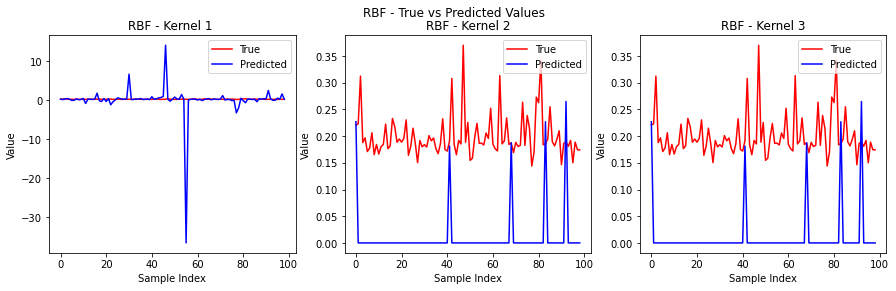

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_metrics = []

fig,ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle('RBF - True vs Predicted Values')

# RBF with ConstantKernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X_train, y_train)
y_pred, sigma = model.predict(X_test, return_std=True)

model_metrics.append({
    'model': 'RBF - ConstantKernel',
    'r2': r2_score(y_test, y_pred), 
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': mean_squared_error(y_test, y_pred, squared=False)
})

ax[0].plot(y_test,'r', label='True')
ax[0].plot(y_pred,'b', label='Predicted')
ax[0].set(title = 'RBF - Kernel 1 ', xlabel='Sample Index', ylabel='Value')
ax[0].legend(loc='upper right')


# RBF with RBF kernel
kernel = 1.0 * RBF(1.0)
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X_train, y_train)
y_pred, sigma = model.predict(X_test, return_std=True)

model_metrics.append({
    'model': 'RBF - RBF Kernel',
    'r2': r2_score(y_test, y_pred), 
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': mean_squared_error(y_test, y_pred, squared=False)
})

ax[1].plot(y_test,'r', label='True')
ax[1].plot(y_pred,'b', label='Predicted')
ax[1].set(title = 'RBF - Kernel 2', xlabel='Sample Index', ylabel='Value')
ax[1].legend(loc='upper right')

# RBF - Kernel 3
kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X_train, y_train)
y_pred, sigma = model.predict(X_test, return_std=True)
model_metrics.append({
    'model': 'RBF - Matern',
    'r2': r2_score(y_test, y_pred), 
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': mean_squared_error(y_test, y_pred, squared=False)
})

ax[2].plot(y_test,'r', label='True')
ax[2].plot(y_pred,'b', label='Predicted')
ax[2].set(title = 'RBF - Kernel 3', xlabel='Sample Index', ylabel='Value')
ax[2].legend(loc='upper right')
plt.show()

### Kriging

In [5]:
# !pip install smt

C:\Users\ags22007\AppData\Roaming\Python\Python39\site-packages\smt\surrogate_models\gpx.py:23: UserWarning: To use GPX you have to install dependencies: pip install smt['gpx']
  warnings.warn("To use GPX you have to install dependencies: pip install smt['gpx']")
C:\Users\ags22007\AppData\Roaming\Python\Python39\site-packages\smt\surrogate_models\krg_based.py:486: UserWarning: Warning: multiple x input features have the same value (at least same row twice).
  warnings.warn(


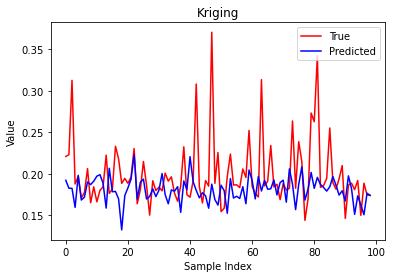

In [6]:
from smt.surrogate_models import KRG

model = KRG(print_global=False)
model.set_training_values(X_train, y_train)
model.train()

y_pred = model.predict_values(X_test)
y_var = model.predict_variances(X_test) # estimate gaussian variance

model_metrics.append({
    'model': 'Kriging',
    'r2': r2_score(y_test, y_pred), 
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': mean_squared_error(y_test, y_pred, squared=False)
})

fig,ax = plt.subplots(1,1, figsize=(6,4))

ax.plot(y_test,'r', label='True')
ax.plot(y_pred,'b', label='Predicted')
ax.set(title = 'Kriging', xlabel='Sample Index', ylabel='Value')
ax.legend(loc='upper right')

plt.show()

### Random Forest Regressor

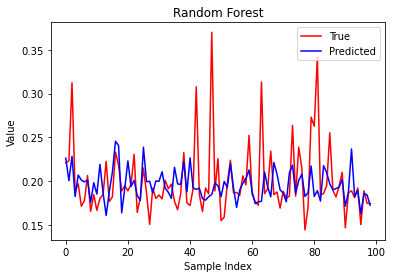

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

model_metrics.append({
    'model': 'Random Forest Reg',
    'r2': r2_score(y_test, y_pred), 
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': mean_squared_error(y_test, y_pred, squared=False)
})


fig,ax = plt.subplots(1,1, figsize=(6,4))

ax.plot(y_test,'r', label='True')
ax.plot(y_pred,'b', label='Predicted')
ax.set(title = 'Random Forest', xlabel='Sample Index', ylabel='Value')
ax.legend(loc='upper right')

plt.show()

### Suppor Vector Regressor

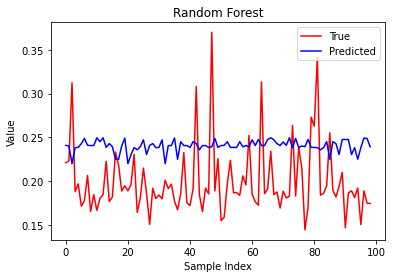

In [8]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

model_metrics.append({
    'model': 'Support Vector Reg',
    'r2': r2_score(y_test, y_pred), 
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': mean_squared_error(y_test, y_pred, squared=False)
})


fig,ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(y_test,'r', label='True')
ax.plot(y_pred,'b', label='Predicted')
ax.set(title = 'Support Vector Regressor', xlabel='Sample Index', ylabel='Value')
ax.legend(loc='upper right')

plt.show()

In [9]:
metrics_df = pd.DataFrame(model_metrics)
metrics_df

,model,r2,mae,mse,rmse
0,RBF - ConstantKernel,-10602.694041,0.888780,16.344330,4.042812
1,RBF - RBF Kernel,-24.521712,0.190622,0.039339,0.198340
2,RBF - Matern,-24.521711,0.190622,0.039339,0.198340
3,Kriging,-0.211312,0.028311,0.001867,0.043210
4,Random Forest Reg,-0.024484,0.024426,0.001579,0.039738
5,Support Vector Reg,-1.203288,0.053231,0.003396,0.058276


## Random Forest - Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_model

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [50]:
# results = pd.DataFrame(grid_search.cv_results_)
# results['r2'] = results.params.apply(lambda params: r2_score(y_test, RandomForestRegressor(**params,random_state=42).fit(X_train, y_train).predict(X_test)))
# results['mse'] = results.params.apply(lambda params: mean_squared_error(y_test, RandomForestRegressor(**params,random_state=42).fit(X_train, y_train).predict(X_test)))
# results['rmse'] = np.sqrt(results['mse'])
# results[['param_max_depth','param_n_estimators','rank_test_score','r2','mse','rmse']]

def evaluate_rf_model(params):
    model = RandomForestRegressor(**params,random_state=42)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    stats = [r2_score(y_test, y_pred),
             mean_squared_error(y_test, y_pred),
             np.sqrt(mean_squared_error(y_test, y_pred))]
    return pd.Series(stats, index=['r2','mse','rmse'])

results = pd.DataFrame(grid_search.cv_results_)
results[['r2','mse','rmse']] = results['params'].apply(evaluate_rf_model)
results[['param_max_depth','param_n_estimators','rank_test_score','r2','mse','rmse']]

,param_max_depth,param_n_estimators,rank_test_score,r2,mse,rmse
0,10,100,3,-0.007942,0.001554,0.039416
1,10,200,5,-0.006623,0.001552,0.039390
2,10,300,4,-0.000484,0.001542,0.039270
3,10,400,2,-0.003821,0.001547,0.039335
4,10,500,1,0.000191,0.001541,0.039257
5,20,100,22,-0.028703,0.001586,0.039820
6,20,200,21,-0.024595,0.001579,0.039740
7,20,300,17,-0.021482,0.001574,0.039680
8,20,400,9,-0.021591,0.001575,0.039682
9,20,500,13,-0.019216,0.001571,0.039636


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


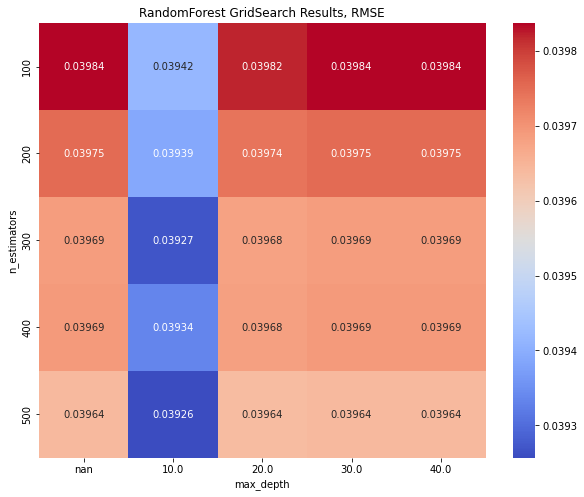

In [51]:
import seaborn as sns
plot_data = results.pivot('param_n_estimators', 'param_max_depth', 'rmse')
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(plot_data, annot=True, fmt='.5f', cmap='coolwarm')
ax.set(title='RandomForest GridSearch Results, RMSE',
      xlabel='max_depth', ylabel='n_estimators')
plt.show()

In [43]:
results.params

0       {'max_depth': 10, 'n_estimators': 100}
1       {'max_depth': 10, 'n_estimators': 200}
2       {'max_depth': 10, 'n_estimators': 300}
3       {'max_depth': 10, 'n_estimators': 400}
4       {'max_depth': 10, 'n_estimators': 500}
5       {'max_depth': 20, 'n_estimators': 100}
6       {'max_depth': 20, 'n_estimators': 200}
7       {'max_depth': 20, 'n_estimators': 300}
8       {'max_depth': 20, 'n_estimators': 400}
9       {'max_depth': 20, 'n_estimators': 500}
10      {'max_depth': 30, 'n_estimators': 100}
11      {'max_depth': 30, 'n_estimators': 200}
12      {'max_depth': 30, 'n_estimators': 300}
13      {'max_depth': 30, 'n_estimators': 400}
14      {'max_depth': 30, 'n_estimators': 500}
15      {'max_depth': 40, 'n_estimators': 100}
16      {'max_depth': 40, 'n_estimators': 200}
17      {'max_depth': 40, 'n_estimators': 300}
18      {'max_depth': 40, 'n_estimators': 400}
19      {'max_depth': 40, 'n_estimators': 500}
20    {'max_depth': None, 'n_estimators': 100}
21    {'max_d